In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns

In [15]:
df = pd.read_csv('My_CHI._My_Future._Programs.csv')

In [16]:
df = clean_columns(df)

39 column names have been cleaned

In [17]:
df.head(1)

,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,address,city,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
0,138124,How to Finally Get Consistent with Healthy Eating,During this workshop youÕll identify the main ...,Chicago Public Library,Academic Support,NaN,13,99,NaN,NaN,...,False,False,online,NaN,False,False,Event,NaN,NaN,NaN


In [42]:
df.program_name

0        How to Finally Get Consistent with Healthy Eating
1                   English Conversation with Chicago Lawn
2        Law at the Library: Changes in Tax Law, Know B...
3               Voices for Justice: Author Qian Julie Wang
4        Science Fiction & Fantasy Book Group: Dawn by ...
                               ...                        
68591                Tumbling Lev. 4 - 6 at Morgan Park SC
68592    Ice Skating - Freestyle Ice Basic1-FS6 at Morg...
68593     Ice Skating - Adult Open Skate at Morgan Park SC
68594                       Stick & Puck at Morgan Park SC
68595              Ice Skating - Basic 1 at Morgan Park SC
Name: program_name, Length: 68596, dtype: object

Notes



In [43]:
df.meeting_type.value_counts()

face_to_face    61662
online           6934
Name: meeting_type, dtype: int64

## Splitting Data

### Meeting Type

In [28]:
df_online = df[df['meeting_type'] == 'online']

In [29]:
df_face = df[df['meeting_type'] == 'face_to_face']

In [30]:
df_face.head(1)

,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,address,city,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
135,106198,"All CPL Locations Closed Thursday, November 25","All CPL locations will be closed Thursday, Nov...",Chicago Public Library,Helping Your Community.,99.0,0,99,NaN,Chicago,...,False,False,face_to_face,NaN,False,False,Event,NaN,NaN,NaN


In [33]:
df_face.transport_provided.value_counts()

False    61234
True        69
Name: transport_provided, dtype: int64

In [34]:
# dataframe of in person programs where transportation is provided
df_tp_og_index = df[df['transport_provided'] == True]

In [35]:
# reindexing df_tp_og_index for ease of use when working with rows where transportation is provided
df_tp = df_tp_og_index.reset_index()

In [36]:
#dropping old index
df_tp = df_tp.iloc[: , 1:]

In [37]:
df_tp

,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,address,city,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
0,121076,Test Program 4/21/2022-4,<p>Test for no address</p>,DYN Tech,Transportation,NaN,4,21,1234 East 56th Street,Chicago,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.793495,-87.595184,POINT (-87.595184326 41.793495178)
1,98698,Kayak and Caring for the Environment,<p>Time: 9:30 a.m. - 2:30 p.m.<br>Capacity: 15...,John G. Shedd Aquarium,Science,15.0,13,18,NaN,NaN,...,True,False,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,NaN,NaN,NaN
2,124453,Cannabis Legal Studies,<p><strong>Program Overview</strong></p><p>Leg...,LAW AND THE FAM ℠,Work + Career,25.0,18,25,NaN,NaN,...,True,True,online,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Job,NaN,NaN,NaN
3,98700,Kayak and Caring for the Environment,<p>Dates: Please only select one of three date...,John G. Shedd Aquarium,Nature.,15.0,13,18,NaN,NaN,...,True,False,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,NaN,NaN,NaN
4,127088,Chicago200,<p>Chicago200 is an annual leadership program ...,Common Purpose,Helping Your Community.,NaN,18,25,NaN,Chicago,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,134605,"Christ, Camping, & Coming of Age","<p>Two safe, fun-filled, and spiritually nurtu...",Agape Center,Nature.,12.0,11,14,9600 Wolf Road,Willow Springs,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,41.713299,-87.895203,POINT (-87.895202637 41.713298798)
67,134606,"Christ, Camping, & Coming of Age","<p>Two safe, fun-filled, and spiritually nurtu...",Agape Center,Sports + Wellness.,12.0,11,14,9600 Wolf Road,Willow Springs,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,41.713310,-87.895157,POINT (-87.89515686 41.713310242)
68,134605,"Christ, Camping, & Coming of Age","<p>Two safe, fun-filled, and spiritually nurtu...",Agape Center,Sports + Wellness.,12.0,11,14,9600 Wolf Road,Willow Springs,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,41.713299,-87.895203,POINT (-87.895202637 41.713298798)
69,94257,MAPSCorps @ Centers for New Horizons - Altgeld...,<p>Are you ready to build skills for your futu...,MAPSCorps,Work + Career,10.0,16,19,13107 South Ingleside Avenue,Chicago,...,True,False,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Job,41.657211,-87.599350,POINT (-87.599349976 41.657211304)


In [119]:
# removing a single NaN row
df = df.loc[df.index != 65887]

In [185]:
# there was 1 row value in the category_name column called "Computers" and 777 called "Computers." - replacing "Computer with "Computers.
df["category_name"] = df["category_name"].replace("Computers", "Computers.")

Some notes / questions
1. For categories, what does the academic support category look like? Can reading & writing, social studies, science, science/math be included in academic support or should they be kept separate?


In [160]:
df.program_price.value_counts()

Free             27362
$50 or Less      23771
More Than $50     7004
Unknown           3524
Name: program_price, dtype: int64

In [181]:
program_price_grouped = df.groupby(['program_price', 'category_name'], dropna = False)

In [182]:
program_price_grouped.size()

program_price  category_name           
$50 or Less    Academic Support             559
               Building & Fixing Things     237
               Computers.                     6
               Customer/Human Service         2
               Digital Media.                38
                                           ... 
Unknown        Music & Art.                  85
               Nature.                       12
               Reading & Writing.             2
               Science                        3
               Sports + Wellness.          3408
Length: 61, dtype: int64

In [186]:
pivot_table = program_price_grouped.size().unstack('category_name')

In [187]:
pivot_table

category_name,Academic Support,Building & Fixing Things,Computers.,Customer/Human Service,Digital Media.,Food.,Healthcare,Helping Your Community.,Law,Managing Money.,...,Nature.,Performance.,Reading & Writing.,Science,Science & Math,Social Studies,Sports + Wellness.,Teaching,Transportation,Work + Career
program_price,,,,,,,,,,,,,,,,,,,,,
$50 or Less,559.0,237.0,6.0,2.0,38.0,43.0,51.0,5.0,NaN,NaN,...,222.0,95.0,109.0,208.0,NaN,1.0,18907.0,2.0,1.0,1.0
Free,575.0,706.0,759.0,29.0,52.0,287.0,276.0,384.0,2.0,235.0,...,388.0,258.0,4218.0,816.0,1.0,115.0,6916.0,3.0,6.0,211.0
More Than $50,611.0,81.0,13.0,NaN,NaN,NaN,13.0,6.0,NaN,NaN,...,30.0,77.0,7.0,17.0,NaN,NaN,5286.0,1.0,NaN,4.0
Unknown,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,2.0,3.0,NaN,NaN,3408.0,NaN,NaN,NaN


### Max Age – Greater than 25 should be family event

In [40]:
#df_young = df.loc[df['max_age'] <= 25]

ImportError: cannot import name 'find_stack_level' from 'pandas.util._exceptions' (/Users/ashleywitarsa/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_exceptions.py)

## VISUALIZATIONS

### Meeting Types

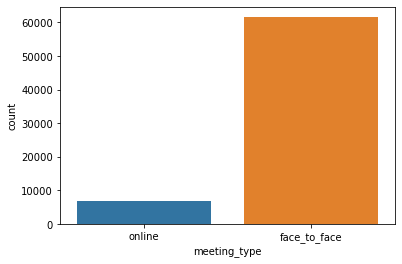

In [19]:
# Count based on meeting types
sns.countplot(x='meeting_type', data=df)
plt.show()

### Top Categories

In [23]:
df['category_name'].value_counts().head(5)

Sports + Wellness.    35310
Music & Art.          17274
Reading & Writing.     6830
Academic Support       2127
Science                1310
Name: category_name, dtype: int64

In [24]:
# Create a new DataFrame from the top 5 values
df_top_5 = pd.DataFrame({'column_name': df['category_name'].value_counts().head(5).index, 'count': df['category_name'].value_counts().head(5).values})

# Display the new DataFrame
print(df_top_5)

          column_name  count
0  Sports + Wellness.  35310
1        Music & Art.  17274
2  Reading & Writing.   6830
3    Academic Support   2127
4             Science   1310


In [ ]:
top_categories = df.loc[df['category_name'].]

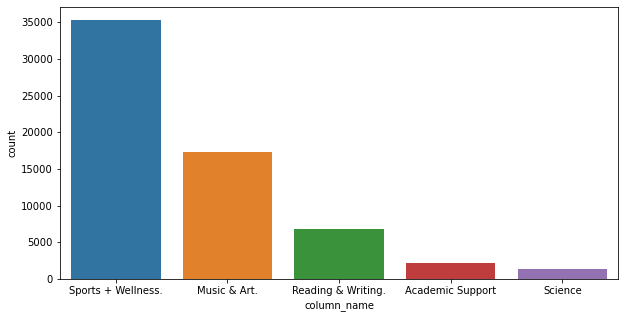

In [27]:
# Count based on category name
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = df_top_5)
plt.show()

In [38]:
df['max_age'].value_counts()

99     22975
13      7585
18      6907
6       6352
12      2964
10      2931
4       2600
5       1859
14      1774
3       1576
19      1345
11      1278
9       1151
15      1067
16       892
7        860
17       829
24       604
65       529
0        512
8        504
22       500
2        361
21       252
20        85
60        56
25        37
23        25
26        23
30        19
100       16
1         16
55        12
64        11
40        10
50         8
51         7
56         7
45         6
62         6
66         6
71         6
63         5
27         4
34         3
70         3
75         3
61         2
35         2
31         2
29         2
28         2
110        1
52         1
171        1
78         1
80         1
Name: max_age, dtype: int64